# 作業二：MLB 資料視覺化

## 作業要求：
* 使用提供的 .ipynb 模板
* 計算所有大聯盟球員的平均得分（Runs）將球員分為「高得分」與「低得分」兩組
* 將兩組球員的 *得分指標（如下）* 全部相加 畫出這兩組的 correlation matrix
* 解釋你對結果的看法

## 得分指標
* 得分（Runs Scored, R）
* 打點（Runs Batted In, RBI）
* 安打數（Hits, H）
* 全壘打數（Home Runs, HR）
* 打擊率（Batting Average, AVG）
* 上壘率（On-Base Percentage, OBP）
* 長打率（Slugging Percentage, SLG）
* 盜壘數（Stolen Bases, SB）
* 打數（At Bats, AB）
* 四壞球率（Walks, BB）
* 被三振數（Strikeouts, K）


## 引入套件
這份作業會使用：
* [pandas](https://pandas.pydata.org/)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [1]:
## TODO 1: 引入需使用的套件
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取檔案
使用 pandas 讀入 csv 檔，成為 dataframe

In [2]:
## TODO 2: 讀取檔案

# 讀取你的檔案
file_path = "hw2_scrapy/output.csv"
mlb_df = pd.read_csv(file_path)

# 檢查
mlb_df.head

<bound method NDFrame.head of     AB    AVG  BB  G   H  HR    OBP            PLAYER  R  RBI  SB    SLG  SO  \
0    8  0.625   0  2   5   1  0.625    Michael Harris  2    2   0  1.125   1   
1   11  0.455   1  3   5   2  0.500   Jackson Chourio  3    3   1  1.000   1   
2   26  0.423   3  7  11   4  0.500    Fernando Tatis  8    7   0  1.000   2   
3    7  0.429   0  2   3   1  0.429    Cedric Mullins  1    1   0  1.000   1   
4   12  0.333   5  4   4   1  0.529      Bryce Harper  3    3   0  0.750   5   
..  ..    ...  .. ..  ..  ..    ...               ... ..  ...  ..    ...  ..   
86   9  0.000   0  3   0   0  0.100      Rhys Hoskins  0    1   0  0.000   3   
87   8  0.000   0  2   0   0  0.000    Ramón Laureano  0    0   0  0.000   4   
88   7  0.000   0  2   0   0  0.000  Ryan Mountcastle  0    0   0  0.000   4   
89  11  0.000   0  3   0   0  0.000        Joey Ortiz  0    0   0  0.000   2   
90   6  0.000   0  2   0   0  0.000       Gio Urshela  0    0   0  0.000   2   

   TEAM  

## 處理資料
在這步驟，我們要先計算所有球員的平均得分，從而將球員分成高得分組與低得分組

In [3]:
# TODO 3: 處理資料

# 計算所有球員 Runs 的平均值
R_mean = mlb_df["R"].mean()

# 將球員分成得分高於平和低於平均兩組
above_avg_df = mlb_df[mlb_df["R"] >= R_mean]
below_avg_df = mlb_df[mlb_df["R"] < R_mean]

## 資料視覺化
我們要分別對上面兩 dataframe 算出 [correlation matrix](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)，並使用 [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 為其視覺化

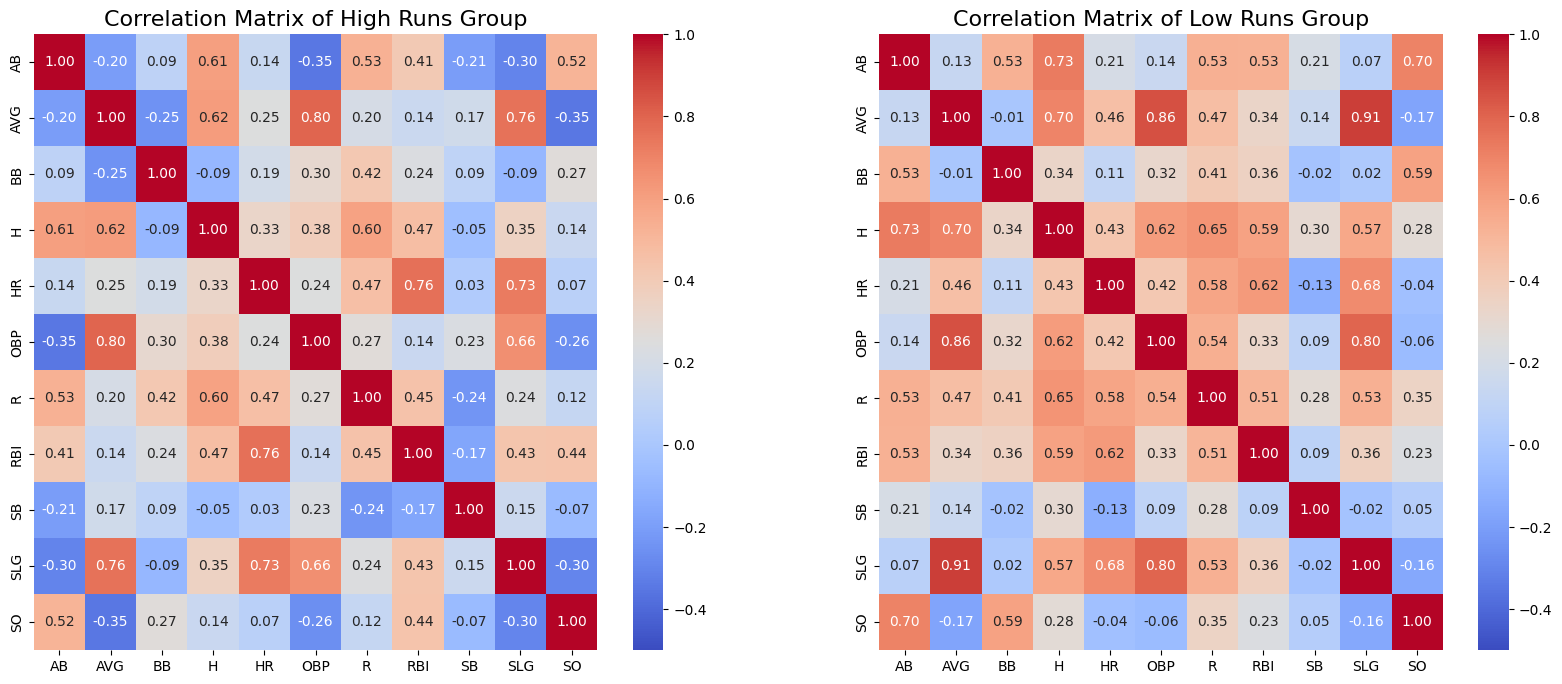

In [4]:
# TODO 4: 資料視覺化

# 要計算的欄位
numeric_cols = [
    'AB', 'AVG', 'BB', 'H', 'HR', 'OBP',
    'R', 'RBI', 'SB', 'SLG', 'SO'
]

# 計算 correlation matrix
above_avg_cor_matrix = above_avg_df[numeric_cols].corr()
below_avg_cor_matrix = below_avg_df[numeric_cols].corr()

# 請將兩張圖娉排顯示。左邊是高得分組的 heatmap，右邊是低得分組
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1) # 請設定子圖位置
# 繪製高得分組的 heatmap
# Color palette >> cmap="coolwarm", The range of values for the color scale >> vmin=-1, vmax=1
sns.heatmap(above_avg_cor_matrix, annot=True, cmap="coolwarm", vmin=-0.5, vmax=1, fmt=".2f")
plt.title('Correlation Matrix of High Runs Group', fontsize=16)

plt.subplot(1, 2, 2) # 請設定子圖位置
# 繪製低得分組的 heatmap
sns.heatmap(below_avg_cor_matrix, annot=True, cmap='coolwarm', vmin=-0.5, vmax=1, fmt=".2f")
plt.title('Correlation Matrix of Low Runs Group', fontsize=16)

plt.show()

## 你的解讀
請回下列問題（直接將回答寫在這個 cell）

### Q1: 影響「高得分組」球員得分（Runs, R）較多的得分指標，和影響影響「低得分組」較多的指標一樣嗎？
影響「高得分組」球員得分（Runs, R）最多的前5得分指標為安打數（H）、打數（AB）、全壘打數（HR）、打點（RBI）、四壞球率（BB）；影響「低得分組」球員得分（Runs, R）最多的前5得分指標為安打數（H）、全壘打數（HR）、上壘率（OBP）、打數（AB）、長打率（SLG）。因此，影響「高得分組」球員得分（Runs, R）較多的得分指標，和影響「低得分組」較多的指標不一樣。
### Q2: 從這兩者的差距中，你觀察到了什麼、會如何解讀這樣的差距呢？（例如，你能說出影響球員是否會成為高得分球員的關鍵因素嗎？）
我觀察到，四壞球率（BB） 在高得分組球員中是影響得分的關鍵指標之一，但在低得分組球員中並未顯著影響得分。這表明，高得分組球員更善於利用四壞球上壘，他們能夠通過選球來避免不必要的出局，進而增加上壘機會，這也是高得分的重要原因之一。